# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd 
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import os
import random
import time
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer



In [3]:
archives=pd.read_csv('twitter-archive-enhanced.csv')
archives.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
with open('image-predictions.tsv', 'wb') as file:
    file.write(r.content)

In [6]:
img_predict=pd.read_csv('image-predictions.tsv',sep='\t')
img_predict.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese_dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True
64,667171260800061440,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,1,giant_schnauzer,0.841265,True,Lakeland_terrier,0.052744,True,Irish_water_spaniel,0.034402,True
1986,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,1,Pembroke,0.931861,True,Cardigan,0.037721,True,Chihuahua,0.011967,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
       # except tweepy.TweepError as e:
           # print("Fail")
           # fails_dict[tweet_id] = e
            #ass
#end = timer()
#print(end - start)
#print(fails_dict)

In [7]:
tweet_data_columns = ['id', 'favorite_count', 'retweet_count']

tweet_data = []
with open('tweet-json.txt', 'r') as r: 
    json_tweet = r.readline()
    while json_tweet:
        dictionnary = json.loads(json_tweet)
        data_row = dict((i, dictionnary[i]) for i in tweet_data_columns)
        tweet_data.append(data_row)
        json_tweet = r.readline()

tweet_df = pd.DataFrame.from_dict(tweet_data)
tweet_df.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
archives.tweet_id.duplicated().sum()

0

- source displays other characters than the url. 
- there are many None values in doggo, floofer, pupper,and puppo. Doggo, floofer, pupper, puppo should be in one columnStages and list them as the stage. 
- Name column has none values as well as other values that are not names like; such quite, a, an, the

In [9]:
archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- Timestamp in incorrect data type, should be datetime. 
- dog types should be categorial instead of string 
- tweetID should be string
- rating numerator and denominator should be int not float 


In [11]:
all_columns = pd.Series(list(archives) + list(img_predict) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [12]:
archives.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Bailey         7
Buddy          7
Toby           7
Daisy          7
Dave           6
Scout          6
Koda           6
Rusty          6
Oscar          6
Milo           6
Leo            6
Jax            6
Jack           6
Stanley        6
Bella          6
Oakley         5
            ... 
Cupid          1
Daniel         1
Monster        1
Teddy          1
Ambrose        1
Willie         1
Mark           1
Einstein       1
light          1
Schnitzel      1
Liam           1
Laika          1
Shikha         1
Dylan          1
Furzey         1
Tove           1
Farfle         1
Jerome         1
Harlso         1
Tug            1
Timofy         1
Jessiga        1
Chaz           1
Puff           1
Lipton         1
Alejandro      1
Snoopy         1
Kloey         

- there are 745 none values and multiple an, a, the values in the name category
- there is a rating numorator and denominator but no rating. add column to calculate rating

In [13]:
img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- prediction column names are not descriptive enough and should be organized to with the prediction number then the categories to clean it up
- some of the predictions are not dogbreeds like paper_towel and orange and banana 
- predictions inconsistent in uppercase lowercase, change all of them to lowercase. 

In [14]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- tweet id should be string not int

In [15]:
img_predict.tweet_id.duplicated().sum()

0

In [16]:
img_predict.jpg_url.duplicated().sum()

66

In [17]:
img_predict[img_predict.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [18]:
tweet_df

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774
5,20562,891087950875897856,3261
6,12041,890971913173991426,2158
7,56848,890729181411237888,16716
8,28226,890609185150312448,4429
9,32467,890240255349198849,7711


In [19]:
tweet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
id                2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


- id should be string and should be changed to tweet_id to match others

In [20]:
tweet_df.id.duplicated().sum()

0

### Quality issues
- tweet_id should be string in all data frames, id column in tweet_df should be changed to tweet id and string data type

- timestamp should be datetime datatype in archives dataframe 

- Name column has none values as well as other values that are not names like; such quite, a, an, the

- There is a rating numorator and denominator but no rating. add column to calculate rating. Rating denominator should be 10 but multiple have other values 

-  Many cells are filled with None, they should be converted to null values. 

- Predictions inconsistent in uppercase lowercase, change all of them to lowercase.

- Id in tweet_df should changed to tweet_id 

- rating numerator and denominators should be int.

- Remove retweets, remove all rows that are not Nan in retweet_status_id, retweet_status_user_id, and retweet_status_timestamp 

- Erranious columns should be removed 

- source column should only display the link



### Tidiness issues

- Doggo, floofer, pupper, puppo should be in one columnStages and list them as the stage.

- predictions should have clearer more desctiptive titles and have a column for each with a prediction 1 prediction 2 and prediction 3 column

- All 3 data frames have tweet_id. Combine all data frames by tweet_id into one clean dataframe.  

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [8]:
archives_clean=archives.copy()
predict_clean=img_predict.copy()
tweets_clean=tweet_df.copy()

#### Define:

### Id column in tweet_df should be changed to tweet id for conisitancy and make it easier to join tables. 

In [9]:
tweets_clean=tweets_clean.rename(columns={'id':'tweet_id'})

#### Test

In [10]:
tweets_clean.head(1)

,favorite_count,tweet_id,retweet_count
0,39467,892420643555336193,8853


#### Define:
## Join all 3 tables together to make once clean data frame to work from. 

In [11]:
df_clean= pd.merge(archives_clean, tweets_clean, how='outer', on='tweet_id', sort=True)
df_clean = pd.merge(df_clean, predict_clean, how = 'outer', on ='tweet_id', sort = True)

#### Test

In [12]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [13]:
df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Define:

### Erraneous Data types
### Tweet_id should be changed to string

#### Code

In [14]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

#### Test

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorite_count                2

#### Define 

### Remove retweets, remove all rows that are not Nan in retweet_status_id, retweet_status_user_id, and retweet_status_timestamp 


#### Code 

In [16]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]

#### Test

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
favorite_count                2175 no

#### Define 

### Erranious columns should be removed, columns are almost all null values and thee columns do not need to be used for analyzing this data. They should be removed to make a cleaner dataframe to work with. 
### Remove retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id, in_reply_to_status_id

In [18]:
df_clean=df_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_user_id', 'in_reply_to_status_id'])

#### Test

In [19]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,...,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Define: 

### Erranious Datatype, timestamp column should be changed to datetime. 

In [20]:
df_clean['timestamp']= pd.to_datetime(df_clean['timestamp'])

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
favorite_count        2175 non-null float64
retweet_count         2175 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1

#### Define:

### Doggo, floofer, pupper, puppo should be in one column. 
### Create new column Stages and list pupper, floofer, doggo and puppo as the stages.
### Make Stages column Category data type
### Remove Doggo, floofer, pupper, and puppo columns after creating new stages column successfully

In [22]:
stage = df_clean[['tweet_id', 'pupper' ,'floofer', 'doggo', 'puppo']].copy()
stage['stage'] = stage[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)
stage.drop(['pupper' ,'floofer', 'doggo', 'puppo'], axis= 1 , inplace =True)

In [23]:
df_clean = pd.merge(df_clean, stage, on = 'tweet_id', sort = True)
df_clean.drop(['pupper' ,'floofer', 'doggo', 'puppo'], axis = 1, inplace = True)

In [24]:
df_clean['stage'] = df_clean['stage'].astype('category')

### Test

In [25]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
230,670385711116361728,2015-11-27 23:36:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,593.0,234.0,...,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True,None
682,682393905736888321,2015-12-31 02:52:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,2441.0,773.0,...,vizsla,0.657275,True,paddle,0.090286,False,Rhodesian_ridgeback,0.048228,True,None
1940,840698636975636481,2017-03-11 22:59:09,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,10,10,None,197.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
956,699779630832685056,2016-02-17 02:17:19,"<a href=""http://twitter.com/download/iphone"" r...",Take all my money. 10/10 https://t.co/B28ebc5LzQ,https://twitter.com/dog_rates/status/699779630...,10,10,None,3039.0,1397.0,...,malinois,0.706038,True,German_shepherd,0.165655,True,Great_Dane,0.059048,True,None
636,680191257256136705,2015-12-25 01:00:07,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,https://twitter.com/dog_rates/status/680191257...,11,10,None,2356.0,577.0,...,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True,pupper


In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
favorite_count        2175 non-null float64
retweet_count         2175 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog               

In [27]:
df_clean.stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: stage, dtype: int64

#### Define:

### Predictions inconsistent in uppercase lowercase. 
### Change all of them to lowercase.

In [28]:
df_clean.p1 = df_clean.p1.str.lower() #makes all p1 predictions lowercase
df_clean.p2 = df_clean.p2.str.lower() #makes all p2 predictions lowercase
df_clean.p3 = df_clean.p3.str.lower() #makes all p3 predictions lowercase

#### Test

In [29]:
df_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,2535.0,532.0,...,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,None
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,132.0,48.0,...,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,None
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,128.0,47.0,...,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,None
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,311.0,147.0,...,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,None
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,111.0,41.0,...,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,None
5,666050758794694657,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,a,136.0,60.0,...,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,None
6,666051853826850816,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,1253.0,879.0,...,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,None
7,666055525042405380,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,a,448.0,261.0,...,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,None
8,666057090499244032,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,304.0,146.0,...,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,None
9,666058600524156928,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,115.0,61.0,...,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,None


#### Define

### Rating denominator and rating numerator should be int datatype

In [30]:
df_clean.rating_denominator = df_clean.rating_denominator.astype(int)
df_clean.rating_numerator = df_clean.rating_numerator.astype(int)

#### Test

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
favorite_count        2175 non-null float64
retweet_count         2175 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog               

#### Define

### There is a rating numorator and denominator but no rating. Add column to calculate rating as rating_score. Rating denominator should be 10 but multiple have other values 
###  Change denominator to 10 for all values 

In [32]:
df_clean['rating_score']=df_clean.rating_numerator/df_clean.rating_denominator
df_clean.rating_denominator = 10

#### Test

In [33]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,rating_score
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,2535.0,532.0,...,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,None,0.8
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,132.0,48.0,...,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,None,0.7
2,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,128.0,47.0,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,None,0.9
3,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,311.0,147.0,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,None,0.6
4,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,111.0,41.0,...,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,None,0.5


In [34]:
df_clean.tweet_id.value_counts().sum()

2175

In [35]:
df_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

#### Define

### source column should only display the link. 


In [36]:
df_clean.source = df_clean.source.str.extract('"([^"]*)" ')

#### Test

In [37]:
df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,rating_score
0,666020888022790149,2015-11-15 22:32:08,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,2535.0,532.0,...,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,None,0.8
1,666029285002620928,2015-11-15 23:05:30,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,132.0,48.0,...,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,None,0.7



#### Define
### Many cells are filled with None, they should be converted to null values
### Convert all values named None to NaN

In [38]:
df_clean=df_clean.replace('None', np.nan)

#### Test

In [39]:
df_clean.head() #None values in name and stage are now NaN

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,rating_score
0,666020888022790149,2015-11-15 22:32:08,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,2535.0,532.0,...,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,NaN,0.8
1,666029285002620928,2015-11-15 23:05:30,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,132.0,48.0,...,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,NaN,0.7
2,666033412701032449,2015-11-15 23:21:54,http://twitter.com/download/iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,128.0,47.0,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN,0.9
3,666044226329800704,2015-11-16 00:04:52,http://twitter.com/download/iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,311.0,147.0,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,NaN,0.6
4,666049248165822465,2015-11-16 00:24:50,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,111.0,41.0,...,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,NaN,0.5


In [40]:
df_clean.info() #Name and stage columns now show correct amount of null values. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
favorite_count        2175 non-null float64
retweet_count         2175 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog               

#### Define

### Name column has none values as well as other values that are not names like; such quite, a, an, the

In [41]:
df_clean.name=df_clean.name.replace(['a','an','the','such quite'], [np.nan, np.nan, np.nan, np.nan])

#### Test

In [42]:
df_clean.name.value_counts()

Lucy           11
Charlie        11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Lola            8
Sadie           8
Winston         8
Toby            7
Daisy           7
Oscar           6
Stanley         6
Koda            6
Jax             6
Bella           6
Bailey          6
Bo              6
Rusty           5
Leo             5
Milo            5
Buddy           5
Louis           5
Bentley         5
Scout           5
Chester         5
Dave            5
Dexter          4
Oakley          4
Sophie          4
               ..
Dylan           1
Lucia           1
Rumpole         1
Chompsky        1
Randall         1
Zooey           1
Gilbert         1
Yukon           1
Trigger         1
Jareld          1
infuriating     1
Ralphus         1
Jazzy           1
Herb            1
Luther          1
Fiji            1
Kevon           1
Fwed            1
Kenny           1
Loomis          1
Brandi          1
Jarod           1
Meyer           1
Aldrick         1
Mairi     

In [43]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'stage',
       'rating_score'],
      dtype='object')

#### Define: 

### Predictions should have clearer titles and have a column for each with a prediction 1 prediction 2 and prediction 3 column

In [44]:
df_clean=df_clean.rename(columns={'p1':'Prediction 1', 'p1_conf': 'predict1_most_confident', 'p1_dog': 'predict_1_is_dog','p2':'Prediction 2', 'p2_conf': 'predict2_most_confident', 'p2_dog': 'predict_2_is_dog', 'p3':'Prediction 3', 'p3_conf': 'predict3_most_confident', 'p3_dog': 'predict_3_is_dog'})

In [45]:
df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,predict1_most_confident,predict_1_is_dog,Prediction 2,predict2_most_confident,predict_2_is_dog,Prediction 3,predict3_most_confident,predict_3_is_dog,stage,rating_score
0,666020888022790149,2015-11-15 22:32:08,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,2535.0,532.0,...,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,NaN,0.8


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
df_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [47]:
df_clean.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,predict1_most_confident,predict2_most_confident,predict3_most_confident,rating_score
count,2175.000000,2175.0,2175.000000,2175.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,2175.000000
mean,13.215172,10.0,8746.022989,2757.987126,1.203109,0.593941,1.344195e-01,6.024848e-02,inf
std,47.725696,0.0,12052.503836,4646.599662,0.560777,0.271954,1.006807e-01,5.089067e-02,NaN
min,0.000000,10.0,52.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.0,1911.500000,608.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,1.000000
50%,11.000000,10.0,4042.000000,1341.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1.100000
75%,12.000000,10.0,11107.000000,3220.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,1.200000
max,1776.000000,10.0,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,inf


In [48]:
df_clean.mean()

tweet_id                           inf
rating_numerator             13.215172
rating_denominator           10.000000
favorite_count             8746.022989
retweet_count              2757.987126
img_num                       1.203109
predict1_most_confident       0.593941
predict_1_is_dog              0.740722
predict2_most_confident       0.134419
predict_2_is_dog              0.749749
predict3_most_confident       0.060248
predict_3_is_dog              0.725176
rating_score                       inf
dtype: float64

In [49]:
df_clean.shape

(2175, 23)

In [50]:
high_retweet_count=df_clean.query('retweet_count>8080')
low_retweet_count=df_clean.query('retweet_count<8080')

In [51]:
low_retweet_count['favorite_count'].mean()

6534.9311701081615

In [52]:
high_retweet_count['favorite_count'].mean()

40642.198581560282

In [53]:
timestamp_year_retweet = df_clean.groupby(df_clean['timestamp'].dt.year)['retweet_count'].sum()
timestamp_year_retweet.mean()

1999540.6666666667

In [54]:
timestamp_year_retweet

timestamp
2015     757069.0
2016    2999171.0
2017    2242382.0
Name: retweet_count, dtype: float64

In [55]:
timestamp_year_favorite = df_clean.groupby(df_clean['timestamp'].dt.year)['favorite_count'].sum()
timestamp_year_favorite.mean()

6340866.666666667

In [56]:
timestamp_year_favorite

timestamp
2015    1738164.0
2016    8270609.0
2017    9013827.0
Name: favorite_count, dtype: float64

In [57]:
df_breed=df_clean.groupby(df_clean['Prediction 1'])['favorite_count'].sum()
df_breed.sort_values(ascending=False).head(10)

Prediction 1
golden_retriever      1696627.0
labrador_retriever    1123850.0
pembroke               994755.0
chihuahua              676441.0
samoyed                542991.0
french_bulldog         465738.0
chow                   404241.0
pug                    320223.0
cocker_spaniel         315825.0
pomeranian             299114.0
Name: favorite_count, dtype: float64

In [58]:
df_breed_retweet=df_clean.groupby(df_clean['Prediction 1'])['retweet_count'].sum()
df_breed_retweet.sort_values(ascending=False).head(10)

Prediction 1
golden_retriever      502096.0
labrador_retriever    366682.0
pembroke              280367.0
chihuahua             220695.0
samoyed               184922.0
french_bulldog        121782.0
chow                  116361.0
pomeranian            106518.0
cocker_spaniel        100561.0
pug                    99182.0
Name: retweet_count, dtype: float64

In [59]:
df_stage_top=df_clean.stage.value_counts()
df_stage_top.head()

pupper     234
doggo       75
puppo       25
floofer     10
None         0
Name: stage, dtype: int64

### Insights:
1. From analyzing the data above we can see that 2016 had the most retweets of the three years and as the years went on the favorites increased on a year to year basis. 

2. We can see that both the most retweeted and most favorited breeds were golden retrievers while number two was lab retrievers. 

3. From the data above we can see that the majority of dogs were in the pupper stage. 

4. We can see from the visualizations below that there is a coorelation betweet the average retweet count and favorite count. 

### Visualization

In [60]:
 def bar_chart():
        chart=plt.bar(locations, heights, tick_label=labels, color=colors)
        return chart

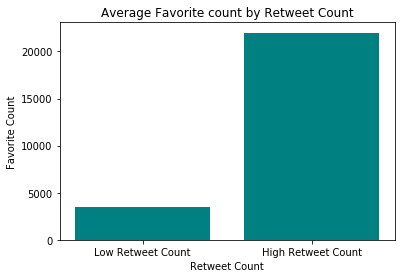

In [61]:
median = df_clean['retweet_count'].mean()
low_retweet_count = df_clean.query('retweet_count < {}'.format(median))
high_retweet_count = df_clean.query('retweet_count >= {}'.format(median))
mean_favorite_low_retweet = low_retweet_count['favorite_count'].mean()
mean_favorite_high_retweet = high_retweet_count['favorite_count'].mean()
locations = [1, 2]
colors =['teal']
heights = [mean_favorite_low_retweet, mean_favorite_high_retweet]
labels = ['Low Retweet Count', 'High Retweet Count']
plt.barchart=bar_chart()
plt.title('Average Favorite count by Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');


#### The above chart shows the average retweet count compaired to the average favorite count. From the above barchart we can see that there is a coorelation between the retweet count and favorite count. The Higher than average retweet counts have a higher favorite count while the lower than average retweet count has a lower favorite count.

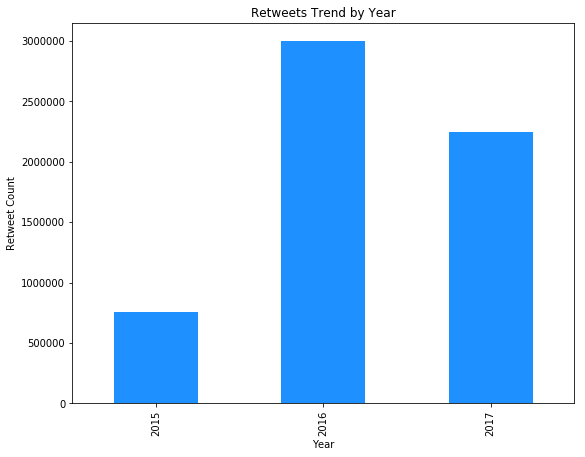

In [63]:
retweet_trend= df_clean.groupby(df_clean['timestamp'].dt.year)['retweet_count'].sum()
retweet_trend_plot = retweet_trend.plot(kind='bar', figsize=(9, 7), color='dodgerblue',linewidth=3.0)
plt.title('Retweets Trend by Year')
plt.xlabel('Year')
plt.ylabel('Retweet Count');

#### The above chart shows the retweet count based on the year. From the aboce chart we can see that 2016 had the most retweets while 2015 had the lowest amount of retweets. 

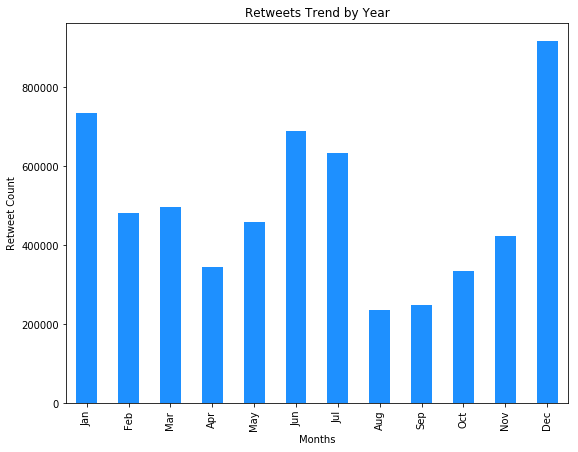

In [65]:
retweet_trend= df_clean.groupby(df_clean['timestamp'].dt.month)['retweet_count'].sum()
retweet_trend_plot = retweet_trend.plot(kind='bar', figsize=(9,7), color='dodgerblue',linewidth=3.0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Retweets Trend by Year')
plt.xlabel('Months')
plt.ylabel('Retweet Count');

#### The above chart shows the retweet count by each month. From the above chart it is clear that in the months of December and January had the most retweets.   

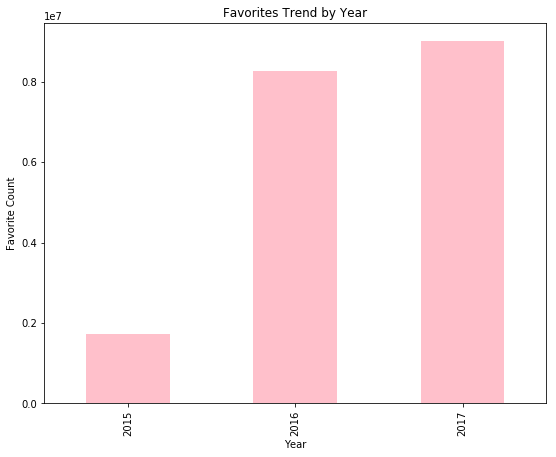

In [66]:
favorite_trend= df_clean.groupby(df_clean['timestamp'].dt.year)['favorite_count'].sum()
favorite_trend_plot = favorite_trend.plot(kind='bar', figsize=(9,7), color='pink',linewidth=3.0)
plt.title('Favorites Trend by Year')
plt.xlabel('Year')
plt.ylabel('Favorite Count');

#### The above chart shows the favorite count based on the year. From looking at the above chart we can see that from 2015 to 2017 the amount of favorite counts increased on a year to year basis having the biggest increase from 2015 to 2016. 

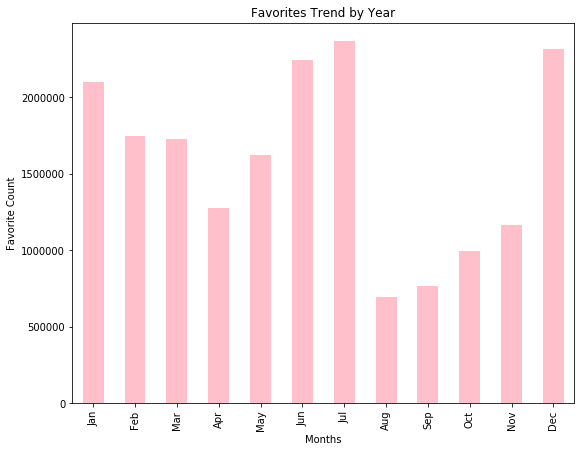

In [67]:
favorite_trend= df_clean.groupby(df_clean['timestamp'].dt.month)['favorite_count'].sum()
favorite_trend_plot = favorite_trend.plot(kind='bar', figsize=(9,7), color='pink',linewidth=3.0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Favorites Trend by Year')
plt.xlabel('Months')
plt.ylabel('Favorite Count');

#### The above chart shows the favorite count by each month. From the above cart we can see that the months with the most favorite counts are June, July, January and Devember while the month with the least amount of favoite was August. 

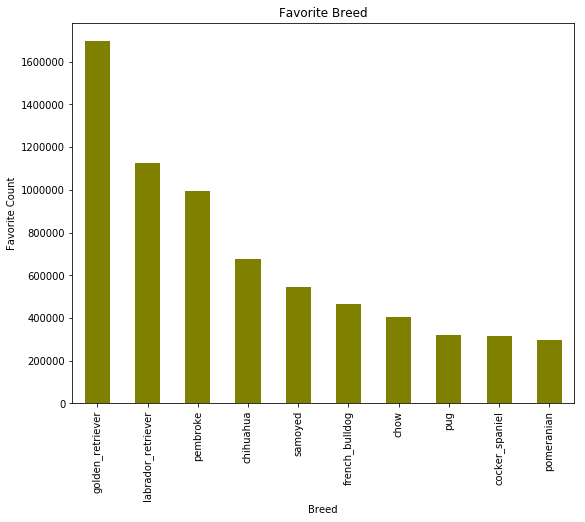

In [68]:
favorite_breed= df_breed.sort_values(ascending=False).head(10)
favorite_breed_plot = favorite_breed.head(10).plot(kind='bar', figsize=(9,7), color='olive',linewidth=3.0)
plt.title('Favorite Breed')
plt.xlabel('Breed')
plt.ylabel('Favorite Count');

#### The bar chart above shows us the top 10 dog breeds with the highest favorite count. We can see that golden retrievers were favorited far more than any other breed while labrador retriever and pembroke came in second and third. 

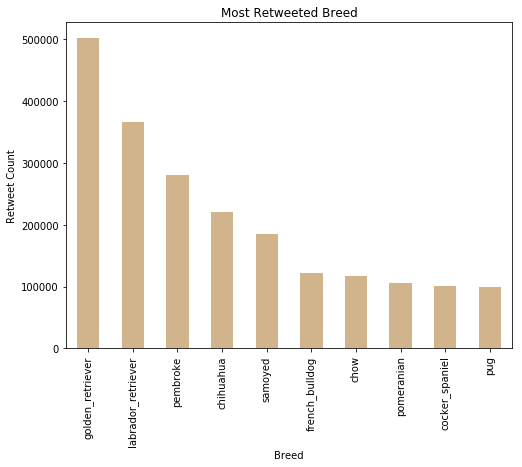

In [71]:
most_retweets_breed= df_breed_retweet.sort_values(ascending=False).head(10)
most_retweets_breed_plot = most_retweets_breed.head(10).plot(kind='bar', figsize=(8,6), color='tan',linewidth=3.0)
plt.title('Most Retweeted Breed')
plt.xlabel('Breed')
plt.ylabel('Retweet Count');

### From the above bar chart that shows the top 10 most retweeted dog breeds, we can see that golden retriever is again tops the list and labrador retriever again came in second and pembroke came in third again rounding out the top three dog breeds.

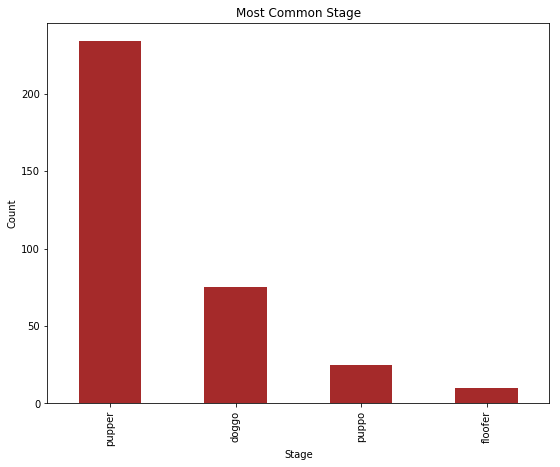

In [70]:
df_stage_top.head(4).plot(kind='bar', figsize=(9,7), color='brown')
plt.title('Most Common Stage')
plt.xlabel('Stage')
plt.ylabel('Count');

#### The above bar chart shows us the most common stage. We can see by looking at the chart that pupper was by far the most common stage while floofer was the least common stage.